# Kaggle One week of Betfair data: 23 sports

A sample of Betfair data available on Kaggle(https://www.kaggle.com/datasets/zygmunt/betfair-sports). All sports except horse racing (for horse racing, there is a twin dataset at https://www.kaggle.com/zygmunt/betfair-horses).


The file has 1306731 data rows. It is 321 MB uncompressed.
Sports IDs:

1 - Soccer
2 - Tennis
3 - Golf
4 - Cricket
5 - Rugby Union
6 - Boxing
8 - Motor Sport
10 - Special Bets
11 - Cycling
1477 - Rugby League
3503 - Darts
3988 - Athletics
4339 - Greyhound Racing
6231 - Financial Bets
6422 - Snooker
6423 - American Football
7511 - Baseball
7522 - Basketball
7524 - Ice Hockey
61420 - Australian Rules
104049 - ? [1 row]
468328 - Handball
998917 - Volleyball
2152880 - Gaelic Games
26420387 - UFC

In [1]:
# do the usaul imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# set the theme to seaborn
sns.set()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataframe
betfair_df = pd.read_csv("resources/betfair_dataset.csv")

# uncomment below to export sample dataset with 10000 records
sample = False
if sample:
    weights = betfair_df['SPORTS_ID'].value_counts(normalize=True)
    sample_df = betfair_df.sample(n=10000, weights='SPORTS_ID', random_state=1)
    sample_df.to_csv("resources/betfair_sample.csv", index=False)

# change sports id to the sports name
sports_names = {1: "Soccer", 2: "Tennis", 3: "Golf", 4: "Cricket", 5: "Rugby", 6: "Boxing", 
                8: "Motor Sport", 10: "Special Bets", 11: "Cycling", 1477: "Rugby",
                3503: "Darts", 3988: "Athletics", 4339: "Greyhound Racing", 6231: "Financial Bets",
                6422: "Billards", 6423: "American Football", 7511: "Baseball", 7522: "Basketball",
                7524: "Hockey", 61420: "Australian Football", 104049: "Unknown", 468328: "Handball",
                998917: "Volleyball", 2152880: "Gaelic Games", 26420387: "UFC"}

betfair_df["SPORTS_ID"] = betfair_df["SPORTS_ID"].map(sports_names)

# change sports id and event id to objects
betfair_df["EVENT_ID"] = betfair_df["EVENT_ID"].astype(object)

# remove all rows where game/event did not go into play i.e canceled for some reason
betfair_df = betfair_df.loc[betfair_df.IN_PLAY != "NI"]

# calculate the total winnings
betfair_df["WIN_AMOUNT"] = betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"] * betfair_df["WIN_FLAG"]

# calculate the loss amount
# https://betting.betfair.com/how-to-use-betfair-exchange/beginner-guides/placing-a-lay-bet-010819-51.html
#betfair_df["LOSS_AMOUNT"] = (betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"] - betfair_df["VOLUME_MATCHED"]) * (1 - betfair_df["WIN_FLAG"])
betfair_df["LOSS_AMOUNT"] = (betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"]) * (1 - betfair_df["WIN_FLAG"])
betfair_df.info()

betfair_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1061101 entries, 0 to 1306745
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   SPORTS_ID         1061101 non-null  object 
 1   EVENT_ID          1061101 non-null  object 
 2   SETTLED_DATE      1043349 non-null  object 
 3   FULL_DESCRIPTION  1060592 non-null  object 
 4   SCHEDULED_OFF     1061101 non-null  object 
 5   EVENT             1043349 non-null  object 
 6   DT ACTUAL_OFF     1061101 non-null  object 
 7   SELECTION_ID      1061101 non-null  int64  
 8   SELECTION         1061101 non-null  object 
 9   ODDS              1061101 non-null  float64
 10  NUMBER_BETS       1061101 non-null  int64  
 11  VOLUME_MATCHED    1061101 non-null  float64
 12  LATEST_TAKEN      1061101 non-null  object 
 13  FIRST_TAKEN       1061101 non-null  object 
 14  WIN_FLAG          1061101 non-null  int64  
 15  IN_PLAY           1061101 non-null  object 
 16  WIN_A

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT
0,Soccer,115279736,04-09-2014 17:07:30,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 15:30,Over/Under 1.5 Goals,04-09-2014 15:32:39,1221386,Over 1.5 Goals,1.35,7,765.54,04-09-2014 16:39:49,04-09-2014 16:39:28,1,IP,1033.4790,0.000
1,Tennis,115288925,04-09-2014 11:50:25,Group A/Brasov Challenger 2014/Second Round Ma...,04-09-2014 10:30,Match Odds,04-09-2014 10:34:32,7659748,Aslan Karatsev,1.12,41,3836.70,04-09-2014 11:44:26,04-09-2014 11:18:57,1,IP,4297.1040,0.000
2,Soccer,115196118,03-09-2014 15:08:55,U21 Euro Championship/Qualifiers/Fixtures 03 S...,03-09-2014 14:00,Over/Under 1.5 Goals,03-09-2014 14:00:45,1221386,Over 1.5 Goals,2.10,6,625.54,03-09-2014 15:00:37,03-09-2014 14:45:28,1,IP,1313.6340,0.000
4,Soccer,115236324,01-09-2014 19:46:39,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,01-09-2014 19:00,Over/Under 0.5 Goals,01-09-2014 19:01:34,5851483,Over 0.5 Goals,1.10,22,1176.46,01-09-2014 19:26:21,01-09-2014 19:20:00,1,IP,1294.1060,0.000
5,Soccer,115184779,02-09-2014 18:38:14,Swedish Soccer/Superettan/Fixtures 02 Septembe...,02-09-2014 17:20,Over/Under 1.5 Goals,02-09-2014 17:20:13,1221386,Over 1.5 Goals,1.34,19,903.18,02-09-2014 18:30:48,02-09-2014 18:28:48,1,IP,1210.2612,0.000
6,Cricket,115245248,NaN,Group C/English Domestic/Royal London One Day ...,04-09-2014 13:00,NaN,04-09-2014 12:59:50,266620,300 Runs or more,4.60,2,47.06,04-09-2014 13:51:12,04-09-2014 13:51:12,0,IP,0.0000,216.476
7,Soccer,115279787,04-09-2014 16:06:00,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 14:15,Over/Under 7.5 Goals,04-09-2014 14:15:00,1485573,Over 7.5 Goals,1.65,2,7.32,04-09-2014 15:25:40,04-09-2014 15:25:40,0,IP,0.0000,12.078
8,Tennis,115280497,05-09-2014 19:52:26,Group A/US Open 2014/Womens Tournament/Semi Fi...,05-09-2014 17:45,Game 06,05-09-2014 18:11:10,2309522,Caroline Wozniacki,1.37,3,110.00,05-09-2014 19:47:07,05-09-2014 19:46:50,1,IP,150.7000,0.000
9,Soccer,115279703,04-09-2014 02:55:01,Brazilian Soccer/Brazilian Cup/Fixtures 04 Sep...,04-09-2014 01:00,Over/Under 6.5 Goals,04-09-2014 00:59:48,2542448,Under 6.5 Goals,1.08,11,304.52,04-09-2014 02:11:01,04-09-2014 01:54:07,1,IP,328.8816,0.000
10,Soccer,115137087,01-09-2014 20:21:08,French Soccer/Ligue 2 Orange/Fixtures 01 Septe...,01-09-2014 18:30,Over/Under 2.5 Goals,01-09-2014 18:30:04,47972,Under 2.5 Goals,1.28,41,2053.18,01-09-2014 20:12:20,01-09-2014 18:58:13,1,IP,2628.0704,0.000


SPORTS_ID
Soccer                 840149
Tennis                 115828
Basketball              24481
Golf                    21282
Cricket                 14235
Rugby                    9777
American Football        7479
Motor Sport              5887
Baseball                 5325
Volleyball               4903
Cycling                  3799
Hockey                   2427
Australian Football      2203
Billards                 1109
UFC                       534
Special Bets              486
Greyhound Racing          402
Gaelic Games              374
Boxing                    319
Handball                  101
Unknown                     1
Name: count, dtype: int64


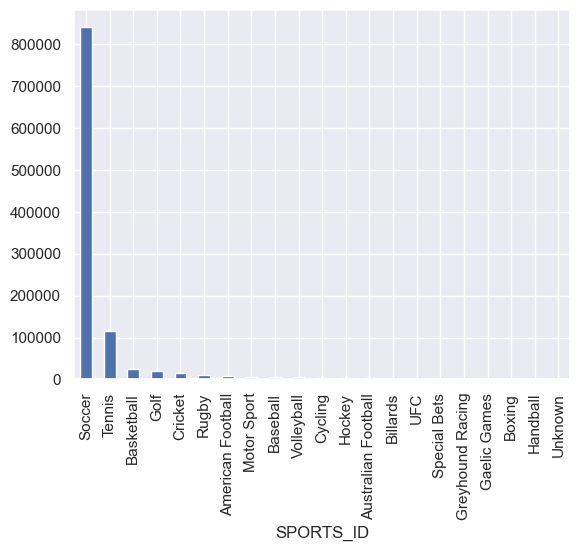

In [3]:
# lets see how many sports/events there are
sports = betfair_df["SPORTS_ID"].value_counts().sort_values(ascending=False)
print(sports)

sports.plot.bar();

In [24]:
# define function to export a sport with bet information
def exportSport(sport_name):
    filename = "output/" + sport_name.lower().replace(" ", "_") + ".csv"
    
    sport_df = betfair_df.loc[betfair_df["SPORTS_ID"] == sport_name]

    games_df = sport_df.groupby("FULL_DESCRIPTION")
    bets = games_df[["NUMBER_BETS", "VOLUME_MATCHED", "WIN_AMOUNT", "LOSS_AMOUNT", "SETTLED_DATE"]].agg({
        "NUMBER_BETS": sum, "VOLUME_MATCHED": sum, "WIN_AMOUNT":sum, 
        "LOSS_AMOUNT": sum, "SETTLED_DATE": 'first'})
    
    # add colulms for country and city so we later grab lat and lng from the geopafi api
    bets["COUNTRY"] = ""
    bets["CITY"] = ""
    bets.to_csv(filename)
    
    return(bets)

In [25]:
# export soccer bets
soccer_df = exportSport("Soccer")
soccer_df

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
Algerian Soccer/Ligue 1/Fixtures 06 September/ES Setif v USM Bel Abbes,1273,16644.00,12232.6506,21270.4386,06-09-2014 20:01:31,,
Anderlecht (W) v OH Leuven (W)/Asian Handicap,2,7.10,0.0000,19.5250,None,,
Argentinian Soccer/Argentinian Primera B Metropolitana/Fixtures 01 September/Estudiantes de Caseros v CA Fenix,1693,30690.96,33057.8786,28235.8778,01-09-2014 17:37:52,,
Argentinian Soccer/Argentinian Primera B Metropolitana/Fixtures 01 September/Estudiantes de Caseros v CA Fenix/Asian Handicap,2,16.40,57.5640,0.0000,None,,
Argentinian Soccer/Argentinian Primera B Metropolitana/Fixtures 02 September/Club Villa Dalmine v CA Atlanta,2953,37557.27,39084.1152,49958.4387,02-09-2014 01:57:39,,
...,...,...,...,...,...,...,...
Womens Soccer/Women's Super League 2/Fixtures 04 September / Yeovil Town (W) v Reading FC (W),677,12267.28,11040.3920,16842.5044,04-09-2014 20:36:47,,
Womens Soccer/Women's Super League 2/Fixtures 07 September / Aston Villa LFC (W) v Yeovil Town (W),382,4437.80,5537.3990,1626.6658,07-09-2014 15:36:47,,
Womens Soccer/Women's Super League 2/Fixtures 07 September / Barnet (W) v Sunderland (W),307,4297.10,4548.1826,2156.8096,07-09-2014 13:59:41,,


In [26]:
# show only MLS soccer games
soccer_df.loc[soccer_df.index.str.contains("MLS")]

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles,12741,343458.13,351403.0126,5.923074e+05,01-09-2014 01:59:09,,
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Asian Handicap,48,2528.12,2279.3974,2.700712e+03,None,,
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Chivas USA Total Goals,12,68.10,0.0000,8.820416e+02,None,,
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Los Angeles Total Goals,16,76.96,74.9388,5.369130e+02,None,,
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Total Goals,11,31.58,0.0000,8.863464e+02,None,,
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle,11251,455230.80,514993.7007,7.135853e+05,04-09-2014 03:20:35,,
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle/Asian Handicap,269,120758.20,8966.6712,2.344644e+05,None,,
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle/Chivas USA Total Goals,25,1904.46,4116.2176,0.000000e+00,None,,
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle/Seattle Total Goals,4,34.70,17.5760,6.998400e+01,None,,


In [27]:
# export soccer bets
exportSport("Tennis")

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
Group A/Alphen Challenger 2014/First Round Matches/Coppejans v de Bakker,4561,150313.60,1.392244e+05,1.191636e+05,02-09-2014 18:51:18,,
Group A/Alphen Challenger 2014/First Round Matches/G Granollers v Androic,3709,199985.68,2.139806e+05,1.225961e+05,03-09-2014 15:14:37,,
Group A/Alphen Challenger 2014/First Round Matches/Garanganga v Giustino,1050,68465.40,7.537596e+04,1.598702e+04,02-09-2014 12:33:33,,
Group A/Alphen Challenger 2014/First Round Matches/Gimeno-Traver v Donati,2444,268465.58,2.891163e+05,5.275217e+04,02-09-2014 14:53:33,,
Group A/Alphen Challenger 2014/First Round Matches/Hanescu v De Greef,1209,124856.94,1.333599e+05,2.199838e+04,03-09-2014 13:59:44,,
...,...,...,...,...,...,...,...
Group A/US Open 2014/Womens Tournament/Semi Final Matches/Ser Williams v E Makarova/Game Betting/Set 01,492,53271.50,5.075566e+04,1.760650e+04,05-09-2014 20:59:21,,
Group A/US Open 2014/Womens Tournament/Semi Final Matches/Ser Williams v E Makarova/Game Betting/Set 02,1276,89527.46,7.076442e+04,5.333688e+04,05-09-2014 21:41:19,,
Group A/US Open 2014/Womens Tournament/The Final/Ser Williams v Wozniacki,35918,17527353.86,1.966115e+07,5.745589e+06,07-09-2014 22:10:43,,


In [28]:
# export basketball bets
basketball_df = exportSport("Basketball")
#basketball_df.loc[basketball_df.index.str.contains("NBA")]
basketball_df

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
Asean Basketball League 2014/Fixtures 03 September/Indonesia Warriors v Singapore Slingers,63,4331.36,3540.4626,1421.2626,03-09-2014 13:51:39,,
Asean Basketball League 2014/Fixtures 03 September/Laskar Dreya v Bangkok City,40,913.00,905.9650,42.5584,03-09-2014 14:02:40,,
Asean Basketball League 2014/Fixtures 05 September/Malaysia Dragons v Laskar Dreya,81,7056.30,7249.2908,413.7500,05-09-2014 13:53:45,,
Asean Basketball League 2014/Fixtures 06 September/Indonesia Warriors v Bangkok City,288,6905.98,6859.1148,3237.9460,06-09-2014 10:51:32,,
Asean Basketball League 2014/Fixtures 07 September/Saigon Heat v Malaysia Dragons,305,11263.30,7186.3722,9446.9928,07-09-2014 13:07:26,,
...,...,...,...,...,...,...,...
International Friendlies 2014/Fixtures 06 September/Spain (W) v Angola (W),44,4203.48,5287.3978,3361.5616,06-09-2014 18:37:28,,
WNBA 2014/Fixtures 01 September/Indiana @ Chicago,4002,284057.00,224246.0320,242430.9646,01-09-2014 22:53:34,,
WNBA 2014/Fixtures 02 September/Minnesota @ Phoenix,1298,65069.68,75256.3506,25319.5432,03-09-2014 03:59:32,,


In [29]:
# export golf bets
exportSport("Golf")

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
Group B/BMW Championship 2014,149070,4712927.68,5.190166e+06,8.088417e+07,05-09-2014 17:40:40,,
Group B/BMW Championship 2014/Tournament Matchbets,152,3633.26,6.218803e+03,5.955442e+02,07-09-2014 22:20:43,,
Group B/Chiquita Classic 2014,1321,6892.82,4.048800e+02,6.530881e+05,07-09-2014 20:11:35,,
Group B/Deutsche Bank Championship 2014,166663,4672132.07,3.546043e+06,1.027464e+08,01-09-2014 21:53:59,,
Group B/Deutsche Bank Championship 2014/Tournament Matchbets,415,10449.26,1.569752e+04,3.782393e+03,01-09-2014 22:08:23,,
Group B/European Masters 2014,73740,1383381.85,1.126412e+06,3.549852e+07,07-09-2014 14:47:13,,
Group B/European Masters 2014/Tournament Matchbets,144,4457.30,2.953357e+03,5.306975e+03,05-09-2014 18:49:05,,
Group B/Portland Classic 2014,182,2130.24,1.903280e+03,2.770250e+04,01-09-2014 01:40:29,,
Group B/Quebec Championship 2014,165,1346.76,0.000000e+00,6.283556e+04,07-09-2014 21:13:36,,


In [30]:
# export american football bets
exportSport("American Football")

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
CFL 2014/Fixtures 05 September/BC @ Ottawa,126,1172.26,1.296345e+03,520.7488,06-09-2014 02:57:14,,
CFL 2014/Fixtures 06 September/Calgary @ Edmonton,127,4104.74,4.019410e+03,3773.9536,07-09-2014 02:05:55,,
CFL 2014/Fixtures 07 September/Hamilton @ Montreal,52,923.90,1.147638e+03,608.8472,07-09-2014 20:33:34,,
CFL 2014/Fixtures 07 September/Saskatchewan @ Winnipeg,46,682.70,1.127231e+03,47.5606,07-09-2014 23:08:31,,
CFL 2014/Week 10/Games 01 September/Edmonton @ Calgary,165,1900.26,2.372951e+03,672.4900,01-09-2014 23:35:56,,
CFL 2014/Week 10/Games 01 September/Toronto @ Hamilton,123,1326.08,1.063872e+03,1561.1192,01-09-2014 20:20:09,,
NCAAF 2014/15/Games 01 September/Miami (FL) @ Louisville,809,30129.06,3.308922e+04,21369.0400,02-09-2014 03:27:37,,
NCAAF 2014/15/Games 04 September/Arizona @ UTSA,182,4140.24,2.569818e+03,5028.2042,05-09-2014 03:38:07,,
NCAAF 2014/15/Games 05 September/Pittsburgh @ Boston College,643,25819.66,2.767255e+04,23030.2162,06-09-2014 02:32:29,,


In [31]:
# export baseball bets
exportSport("Baseball")

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
MLB 2014/Games 01 September/ARI @ SD,240,6517.10,6442.8250,6539.2218,01-09-2014 23:20:33,,
MLB 2014/Games 01 September/BOS @ TB,241,4689.08,3791.1308,5558.6152,01-09-2014 20:46:48,,
MLB 2014/Games 01 September/DET @ CLE,415,30344.70,40520.9854,20217.5316,01-09-2014 23:45:21,,
MLB 2014/Games 01 September/MIL @ CHC,247,4404.30,3490.5716,5118.3414,01-09-2014 21:12:41,,
MLB 2014/Games 01 September/MIN @ BAL,362,7521.48,6174.5696,8763.8514,01-09-2014 20:16:40,,
...,...,...,...,...,...,...,...
MLB 2014/Games 07 September/SD @ COL,132,2083.34,1326.6488,2846.9556,07-09-2014 23:19:22,,
MLB 2014/Games 07 September/SEA @ TEX,189,7455.91,7210.6035,8197.1012,07-09-2014 21:53:27,,
MLB 2014/Games 07 September/STL @ MIL,137,1289.72,1883.4778,575.5380,07-09-2014 21:15:17,,


In [32]:
# export baseball bets
exportSport("Cricket")

,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY
FULL_DESCRIPTION,,,,,,,
Group C/Australia (W) v Pakistan (W) 2014/Australia (W) v Pakistan (W) (3rd T20),29,4850.00,5.002185e+03,0.000000e+00,03-09-2014 05:25:58,,
Group C/Australia (W) v Pakistan (W) 2014/Australia (W) v Pakistan (W) (4th T20),333,12732.88,1.358935e+04,1.295740e+03,05-09-2014 05:44:34,,
Group C/England (W) v South Africa (W) 2014/England (W) v South Africa (W) (1st T20),3051,422927.58,4.613345e+05,1.400027e+05,01-09-2014 19:49:31,,
Group C/England (W) v South Africa (W) 2014/England (W) v South Africa (W) (2nd T20),4525,817663.38,8.847670e+05,2.390827e+05,03-09-2014 20:11:39,,
Group C/England (W) v South Africa (W) 2014/England (W) v South Africa (W) (3rd T20),8331,1149583.94,1.360769e+06,2.144932e+05,07-09-2014 12:21:31,,
...,...,...,...,...,...,...,...
Group C/Zimbabwe Triangular Series 2014/The Final/Australia v South Africa,32180,23158337.77,2.813954e+07,4.372100e+06,06-09-2014 14:44:39,,
Group C/Zimbabwe Triangular Series 2014/The Final/Australia v South Africa/Australia 10 Over Total,616,32508.02,3.098214e+04,1.636239e+04,None,,
Group C/Zimbabwe Triangular Series 2014/The Final/Australia v South Africa/Australia Innings Runs,6417,706658.38,4.999514e+05,1.278809e+06,None,,


In [33]:
# scratch pad
#betfair_df.loc[betfair_df["FULL_DESCRIPTION"] == ""]